Heart Failure Prediction

Dataset : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('heart_failure.csv')
df = pd.DataFrame(data)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,NaN,289.0,0.0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0.0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,NaN,283.0,0.0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,NaN,0.0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,NaN,0.0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,910.000000,910.000000,910.000000,918.000000,918.000000,918.000000
mean,53.510893,132.428571,198.672527,0.235165,136.809368,0.887364,0.553377
std,9.432617,18.581633,109.844416,0.424335,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,172.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,8
Cholesterol,8
FastingBS,8
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,float64
Cholesterol,float64
FastingBS,float64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [ ]:
cols = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak', 'ST_Slope', 'HeartDisease']

In [ ]:
col_to_imp = ['RestingBP', 'Cholesterol','FastingBS']

In [ ]:
df_temp = df
df_temp = df[col_to_imp].apply(lambda col: col.fillna(col.median()))
df_temp.head()

,RestingBP,Cholesterol,FastingBS
0,130.0,289.0,0.0
1,160.0,180.0,0.0
2,130.0,283.0,0.0
3,138.0,223.0,0.0
4,150.0,223.0,0.0


In [ ]:
df = df.drop(['RestingBP', 'Cholesterol','FastingBS'], axis=1)
df_imp = pd.concat([df, df_temp], axis=1)
df_imp.head()

,Age,Sex,ChestPainType,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP,Cholesterol,FastingBS
0,40,M,ATA,Normal,172,N,0.0,Up,0,130.0,289.0,0.0
1,49,F,NAP,Normal,156,N,1.0,Flat,1,160.0,180.0,0.0
2,37,M,ATA,ST,98,N,0.0,Up,0,130.0,283.0,0.0
3,48,F,ASY,Normal,108,Y,1.5,Flat,1,138.0,223.0,0.0
4,54,M,NAP,Normal,122,N,0.0,Up,0,150.0,223.0,0.0


In [ ]:
df_imp.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0
ST_Slope,0
HeartDisease,0
RestingBP,0


In [ ]:
num_cols = ['Age', 'RestingBP', 'Cholesterol','FastingBS', 'MaxHR','Oldpeak']
cat_cols = ['Sex','ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope']

In [ ]:
sc = MinMaxScaler()
df_imp[num_cols] = sc.fit_transform(df_imp[num_cols])
df_imp.head()

,Age,Sex,ChestPainType,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP,Cholesterol,FastingBS
0,0.244898,M,ATA,Normal,0.788732,N,0.295455,Up,0,0.65,0.479270,0.0
1,0.428571,F,NAP,Normal,0.676056,N,0.409091,Flat,1,0.80,0.298507,0.0
2,0.183673,M,ATA,ST,0.267606,N,0.295455,Up,0,0.65,0.469320,0.0
3,0.408163,F,ASY,Normal,0.338028,Y,0.465909,Flat,1,0.69,0.369818,0.0
4,0.530612,M,NAP,Normal,0.436620,N,0.295455,Up,0,0.75,0.369818,0.0


In [ ]:
df_new = df_imp
df_new = pd.get_dummies(df_imp, columns=cat_cols)
df_new.head()

,Age,MaxHR,Oldpeak,HeartDisease,RestingBP,Cholesterol,FastingBS,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.788732,0.295455,0,0.65,0.479270,0.0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,0.428571,0.676056,0.409091,1,0.80,0.298507,0.0,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,0.183673,0.267606,0.295455,0,0.65,0.469320,0.0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,0.408163,0.338028,0.465909,1,0.69,0.369818,0.0,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,0.530612,0.436620,0.295455,0,0.75,0.369818,0.0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [ ]:
x = df_new.drop(['HeartDisease'], axis=1)
y = df_new['HeartDisease']

In [ ]:
y = pd.get_dummies(y)
y.head()

,0,1
0,True,False
1,False,True
2,True,False
3,False,True
4,True,False


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,random_state=42, test_size=0.2)

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(64, input_dim = x_train.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,146 (31.82 KB)

 Trainable params: 8,146 (31.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40, batch_size=50)

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5925 - loss: 0.6496 - val_accuracy: 0.7755 - val_loss: 0.5451
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8080 - loss: 0.5280 - val_accuracy: 0.8707 - val_loss: 0.4357
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8533 - loss: 0.4338 - val_accuracy: 0.8844 - val_loss: 0.3520
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8716 - loss: 0.3715 - val_accuracy: 0.8776 - val_loss: 0.3162
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8617 - loss: 0.3626 - val_accuracy: 0.8980 - val_loss: 0.2921
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8768 - loss: 0.3228 - val_accuracy: 0.8844 - val_loss: 0.2909
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8485 - loss: 0.3697 - val_accuracy: 0.8912 - val_loss: 0.2783
Epoch 8/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8851 - loss: 0.3242 - val_accuracy: 0.8980 - val_loss

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
y_test = np.argmax(y_test, axis=-1)

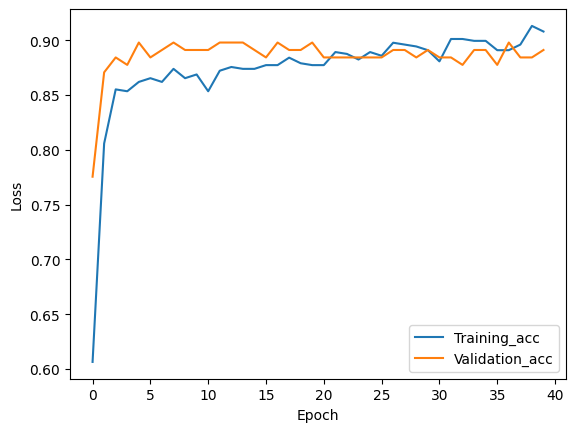

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training_acc', 'Validation_acc'], loc = 'lower right')

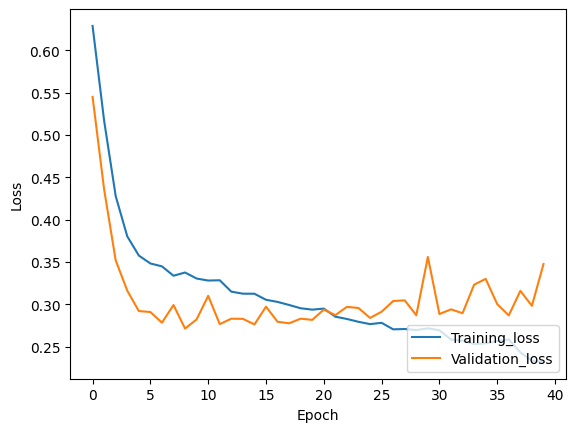

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training_loss', 'Validation_loss'], loc = 'lower right')

<Axes: >

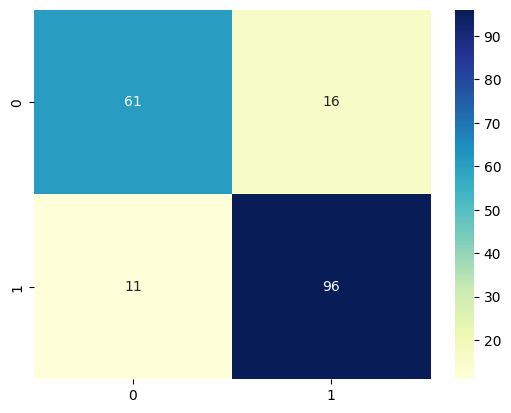

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='g')

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8532608695652174
